<a href="https://colab.research.google.com/github/Ayavie/arabic-fake-name-detection/blob/main/Dataset_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Generation Task
This task will be broken down into multiple subtasks:
1. Merging the multiple datasets files into one csv file.
2. Create 3 Name Combiner
 

*   50% valid names
*   50% invalid names
  * Distorted names
  * female name in middle or last name

3. Merge names into one final dataframe of two labels: [`"name"` , `"valid"`]


## 1.Merging the datasets.

In [ ]:
#Imporing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Initial check on dataset csv quality

In [ ]:
# Reading the csv file
arab_names=pd.read_csv("/content/drive/MyDrive/Names web dataset/Arabic_names.csv")
arab_names.head(5)

,Name,Gender
0,ابتسام,F
1,ابتهاج,F
2,ابتهال,F
3,اجتهاد,F
4,ازدهار,F


In [ ]:
arab_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1405 non-null   object
 1   Gender  1405 non-null   object
dtypes: object(2)
memory usage: 22.1+ KB


In [ ]:
print("Number of null values: ",arab_names.isnull().any().sum() )
print("Number of duplicates values: ",arab_names.duplicated().sum() )

Number of null values:  0
Number of duplicates values:  0


In [ ]:
#Check value counts of genders in csv file
arab_names['Gender'].value_counts()

M    853
F    552
Name: Gender, dtype: int64

This file is set. Now, we will add the other two text files into that csv while keeping its format.

In [ ]:
#read txt files of females and males into a dataframe and add column "Gender" to each
f_df = pd.read_csv('/content/drive/MyDrive/Names web dataset/fnames.txt', header=None, names=["Name"])
f_df["Name"]=f_df["Name"].apply(lambda x: x.strip())
f_df["Gender"]="F"

m_df = pd.read_csv('/content/drive/MyDrive/Names web dataset/mnames.txt',  header=None, names=["Name"])
m_df["Name"]=m_df["Name"].apply(lambda x: x.strip())
m_df["Gender"]="M"

Checking the new dataframes

In [ ]:
m_df.head(5)

,Name,Gender
0,أبان,M
1,أبو بكر,M
2,أبو حمزة,M
3,أحد,M
4,أحمد,M


In [ ]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    640 non-null    object
 1   Gender  640 non-null    object
dtypes: object(2)
memory usage: 10.1+ KB


In [ ]:
m_df.head(5)

,Name,Gender
0,أبان,M
1,أبو بكر,M
2,أبو حمزة,M
3,أحد,M
4,أحمد,M


In [ ]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    416 non-null    object
 1   Gender  416 non-null    object
dtypes: object(2)
memory usage: 6.6+ KB


Now, we are ready to concatenate the dataframes together into one and sort them by gender.

In [ ]:
df = pd.concat([arab_names, f_df, m_df], axis=0, ignore_index=True).reset_index(drop=True)
df.sort_values(by=["Gender"], inplace = True)
df=df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    2461 non-null   object
 1   Gender  2461 non-null   object
dtypes: object(2)
memory usage: 38.6+ KB


Let's check out data quality


In [ ]:
#Check duplicates and nulls
print("Number of null values: ",df.isnull().any().sum() )
print("Number of duplicates values: ",df.duplicated().sum() )

Number of null values:  0
Number of duplicates values:  867


Good! We've got zero null values but we have 867 duplicates!

The duplicates won't hurt as we didn't create a name consists of three names yet.


In [ ]:
df.Gender.value_counts()

M    1493
F     968
Name: Gender, dtype: int64

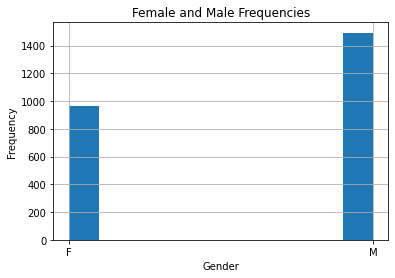

In [ ]:
#Histogram of gender distribution in the dataset
df.Gender.hist();
plt.xlabel("Gender");
plt.ylabel("Frequency");
plt.title("Female and Male Frequencies");

## 2. Create 3-name Combiner

The creation of the dataset will include 2M record.

This stage is divided into two phases:
1. Creating half of the data as valid names (2M)
  

 >  *   Half of the valid names are male names (1M) and the other half is   female names (1M) (**To avoid sampling bias**)




2. Creating half of the data as invalid names (2M)


> *   Half of the invalid names are male names (1M)
*   Half of the invalid names are female names (1M)

> For each half of those:
*   20% of this part of the data have female name in the middle name.
*   20% of this part of the data have female name in the last name.
*   60% of this part of the data have name distortion (3 Levels)










###Creating names functions
The strategy used for selecting names:

After sorting the dataframe by "Gender", we can access name of specific gender using its range index in the dataframe.
> * Female gender range [0,968] 
> * Male gender range [969,1492]

So, if we need a name of specific gender randomly we can sample a random number within its gender range.

After selecting random names, we concatenate them to make a full name.

### 2.1 Creating half of the data as valid names (2M)

In [ ]:
data_size=int(4e06)

In [ ]:
def valid_mname(df,size=int(data_size/4)):
  "Creating a valid male name by sampling 3 numbers within male gender and concatenate them"
  names=[]
  m_rand_first=np.random.randint(969,1493, size=size)
  m_rand_sec=np.random.randint(969,1493, size=size)
  m_rand_third=np.random.randint(969,1493, size=size)
  names=[]
  for i in range(size):
    rand_name=df.Name[m_rand_first[i]]+ " "+df.Name[m_rand_sec[i]]+" "+df.Name[m_rand_third[i]]
    names.append(rand_name)
  return names

In [ ]:
def valid_fname(df,size=int(data_size/4)):
  "Creating a valid female name by sampling 3 numbers within female (First) male gender (Middle and Last) and concatenate them"
  names=[]
  f_rand_first=np.random.randint(968, size=size)
  m_rand_sec=np.random.randint(969,1493, size=size)
  m_rand_third=np.random.randint(969,1493, size=size)
  for i in range(size):
    rand_name=df.Name[f_rand_first[i]]+ " "+df.Name[m_rand_sec[i]]+" "+df.Name[m_rand_third[i]]
    names.append(rand_name)
  return names

### 2.2 Creating half of the data as invalid names (2M)

In [ ]:
def fake_mname(df,size=int(data_size/4)):
  "Creating an invalid male name by sampling 3 numbers of male gender (First), female gender (Middle or Last) and male gender (Middle or last) and concatenate them"
  names=[]
  #Female name in the middle 20%
  m_rand_first=np.random.randint(969,1493, size=size)
  f_rand_sec=np.random.randint(968, size=size)
  m_rand_third=np.random.randint(969,1493, size=size)
  for i in range(int(size*0.2)):
    rand_name=df.Name[m_rand_first[i]]+ " "+df.Name[f_rand_sec[i]]+" "+df.Name[m_rand_third[i]]
    names.append(rand_name)
  #Female name in the end 20%
  m_rand_first=np.random.randint(969,1493, size=size)
  m_rand_sec=np.random.randint(969,1493, size=size)
  f_rand_third=np.random.randint(968, size=size)
  for i in range(int(size*0.2)):
    rand_name2=df.Name[m_rand_first[i]]+ " "+df.Name[m_rand_sec[i]]+" "+df.Name[f_rand_third[i]]
    names.append(rand_name2)

  return names

In [ ]:
def fake_fname(df,size=int(data_size/4)):
  "Creating an invalid female name by sampling 3 numbers of female gender (First), female gender (Middle or Last) and male gender (Middle or last) and concatenate them"
  names=[]
  #Female name in the middle 20%
  f_rand_first=np.random.randint(968, size=size)
  f_rand_sec=np.random.randint(968, size=size)
  m_rand_third=np.random.randint(969,1493, size=size)
  for i in range(int(size*0.2)):
    rand_name=df.Name[f_rand_first[i]]+ " "+df.Name[f_rand_sec[i]]+" "+df.Name[m_rand_third[i]]
    names.append(rand_name)
  #Female name in the end 20%
  f_rand_first=np.random.randint(968, size=size)
  m_rand_sec=np.random.randint(969,1493, size=size)
  f_rand_third=np.random.randint(968, size=size)
  for i in range(int(size*0.2)):
    rand_name2=df.Name[f_rand_first[i]]+ " "+df.Name[m_rand_sec[i]]+" "+df.Name[f_rand_third[i]]
    names.append(rand_name2)
  return names

In [ ]:
#Creating a list of arabic letters to distort names by adding them randomly within the name.
arab_ltrs=["ي" ,"و" ,"ه" ,"ن" ,"م" ,"ل" ,"ك" ,"ق" ,"ف" ,"غ" ,"ع" ,"ط" ,"ظ" ,"ط" ,"ض" ,"ص" ,"ش" ,"س" ,"ز" ,"ر" ,"ذ" ,"د" ,"خ" ,"ح" ,"ج" ,"ث" ,"ت" ,"ب" ,"ا" ]


In [ ]:
def remove_rand_ltr(name,times=3):
  "This function removes letters to a name randomly a specified number of times"
  for i in range(times):
    rand = np.random.randint(0, len(name))
    name=name[:rand] + name[rand+1:]
  return name
def add_rand_ltr(name,times=2):
  "This function adds letters  to a name randomly a specified number of times"
  for i in range (times):
    place = np.random.randint(0, len(name))
    rand_ltr = np.random.randint(0, len(arab_ltrs))
    name=name[:place] + arab_ltrs[rand_ltr] + name[place:]
  return name

In [1]:
def distort_name(names):
  "This function distort names on 3 levels each level of removing and adding random letters a specific number of times at random placement in the name"

  #Level two distortion
  for s in range(int(len(names)*0.3)):
    names[s]=remove_rand_ltr(names[s],2)
    names[s]=add_rand_ltr(names[s],1)

  #Level two distortion
  for s in range(int(len(names)*0.3),int(len(names)*0.6)):
    names[s]=remove_rand_ltr(names[s],3)
    names[s]=add_rand_ltr(names[s],4)

  #Level three distortion
  for s in range(int(len(names)*0.6),int(len(names))):
    names[s]=remove_rand_ltr(names[s],5)
    names[s]=add_rand_ltr(names[s],5)

  return names



Create names and add them to the final dataframe

In [ ]:
# Create valid names
valid_mnames=valid_mname(df)
valid_fnames=valid_fname(df)

# Create invalid names
fake_fnames=fake_fname(df)
fake_mnames=fake_mname(df)
distorted_mname=distort_name(valid_mname(df,size=int(data_size * 3/20)))
distorted_fname=distort_name(valid_fname(df,size=int(data_size * 3/20)))


In [ ]:
#Verifying the size of valid and invalid names

print("Size of valid names: ", len((valid_fnames+valid_mnames)))
print("Size of invalid names: ", len((distorted_fname+distorted_fname+fake_fnames+fake_mnames)))

Size of valid names:  2000000
Size of invalid names:  2000000


**Viola!** 🙂 Now, we are ready to merge those lists into one dataframe.

## 3. Merge names into one final dataframe of two labels: ["name" , "gender","valid"]

In [ ]:
#Create the final dataframe 
full_names=pd.DataFrame(columns=["name","gender","valid"])

In [ ]:
#Names will be added in order so, we will add valid ones then invalid ones
full_names['name']= valid_mnames+valid_fnames+fake_fnames+fake_mnames+distorted_mname+distorted_fname

# We will add labels of 1M of ones for valid and 1M value of zeros for invalid ones
full_names["valid"]=[1] * int(data_size/2) + [0] *  int(data_size/2)

#We will add gender according to the length of each list added and its type
full_names["gender"]=["M"] *len(valid_mnames) + ["F"] * len(valid_fnames) + ["F"] * len(fake_fnames) + ["M"] * len(fake_mnames) + ["M"] * len(distorted_mname) + ["F"] * len(distorted_fname)

#Print the dataset
full_names

,name,gender,valid
0,حسحاس نجدة تركي,M,1
1,نصر نعمت زيدون,M,1
2,جساس فيضي فهيم,M,1
3,داود مالك رامز,M,1
4,رائد مناع مستور,M,1
...,...,...,...
3999995,تمن ثاتضتابجر,F,0
3999996,ميانممككومه لمطوع,F,0
3999997,نكقذخلارخم نص,F,0
3999998,يصمصميا مهمهب,F,0


In [ ]:
full_names.duplicated().sum()

7173

In [ ]:
#Convert dataframe to csv file on drive for later use
full_names.to_csv('/content/drive/MyDrive/datasets/namesdataset.csv', index = False)